In [1]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

2025-05-09 15:42:32.559183: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

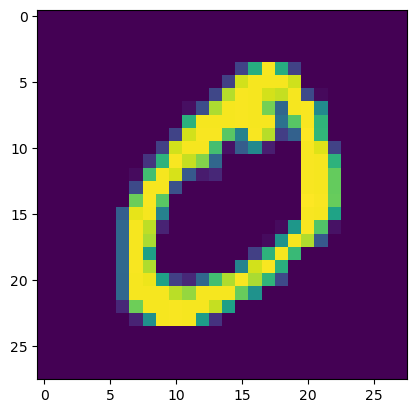

In [3]:
plt.imshow(train_data[1])

In [4]:
train_labels[1]

np.uint8(0)

In [5]:
model = models.Sequential() # modelo secuencial
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # capa densa de 512 neuronas
model.add(layers.Dense(10, activation='softmax')) # capa densa de 10 neuronas porque tenemos 10 salidas, del 0-9

/nix/store/xply3vh8xkhyyhdhvaiiascgqp90yrh5-python3.12-keras-3.8.0/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
x_train = train_data.reshape((60000, 28*28)) # convertimos a 2d
x_train = x_train.astype('float32') / 255 # normalizamos

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 255

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
model.fit(x_train, y_train, epochs=5, batch_size=128) # entrenamos el modelo
test_loss, test_acc = model.evaluate(x_test, y_test) # evaluamos el modelo
print('test_acc:', test_acc) # imprimimos la exactitud del modelo
predictions = model.predict(x_test) # hacemos predicciones

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0272
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0199
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.0161
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0112
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0088
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0661
test_acc: 0.9825000166893005
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
